# EDA

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned up data.csv')

In [3]:
df.head()

,State_name,County_name,Tract,Hispanic_CEN_2010,NH_White_alone_CEN_2010,NH_Blk_alone_CEN_2010,NH_Blk_alone_ACS_09_13,NH_AIAN_alone_CEN_2010,NH_AIAN_alone_ACS_09_13,NH_Asian_alone_CEN_2010,...,pct_Pop_45_64_CEN_2010,pct_Pop_65plus_CEN_2010,pct_No_Health_Ins_ACS_09_13,pct_Hispanic_CEN_2010,pct_NH_White_alone_CEN_2010,pct_NH_Blk_alone_CEN_2010,pct_NH_Asian_alone_CEN_2010,pct_NH_AIAN_alone_CEN_2010,pct_NH_NHOPI_alone_CEN_2010,pct_NH_SOR_alone_CEN_2010
0,Alabama,Autauga County,20100,44.0,1601.0,217.0,148.0,13.0,10.0,14.0,...,27.62,11.56,11.061947,2.30,83.73,11.35,0.73,0.68,0.00,0.05
1,Alabama,Autauga County,20200,75.0,844.0,1214.0,1416.0,5.0,0.0,5.0,...,24.06,9.86,11.847134,3.46,38.89,55.94,0.23,0.23,0.00,0.14
2,Alabama,Autauga County,20300,87.0,2538.0,647.0,559.0,9.0,15.0,17.0,...,24.67,13.02,12.136081,2.58,75.24,19.18,0.50,0.27,0.15,0.21
3,Alabama,Autauga County,20400,85.0,4030.0,191.0,119.0,11.0,22.0,18.0,...,25.56,20.61,14.217579,1.94,91.88,4.35,0.41,0.25,0.07,0.02
4,Alabama,Autauga County,20500,355.0,8438.0,1418.0,1766.0,44.0,39.0,295.0,...,22.51,10.46,7.354161,3.30,78.38,13.17,2.74,0.41,0.06,0.11


In [4]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Born_US_ACS_09_13',
       'Born_foreign_ACS_09_13', 'PUB_ASST_INC_ACS_09_13',
       'Med_HHD_Inc_ACS_09_13', 'Aggregate_HH_INC_ACS_09_13',
       'Med_House_value_ACS_09_13', 'Aggr_House_Value_ACS_09_13',
       

### Oops, looks like I didn't remove some features, let's do that now.

In [5]:
df = df.drop(['Born_US_ACS_09_13','Born_foreign_ACS_09_13', 'PUB_ASST_INC_ACS_09_13',
             'Aggregate_HH_INC_ACS_09_13','Aggr_House_Value_ACS_09_13','avg_Tot_Prns_in_HHD_ACS_09_13',
             'avg_Tot_Prns_in_HHD_CEN_2010'],axis=1)

In [6]:
df.shape

(70219, 57)

In [7]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
   

## Let's explore the data!

### Income data exploration

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


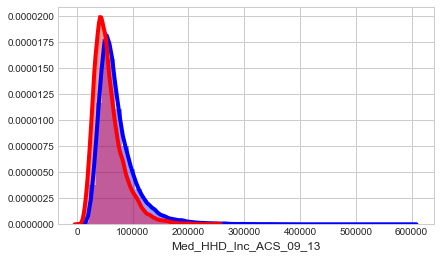

In [8]:
sns.distplot(df.avg_Agg_HH_INC_ACS_09_13, color='blue', label = 'Average Aggregate Income')
sns.distplot(df.Med_HHD_Inc_ACS_09_13, color='red', label = 'Median Income')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


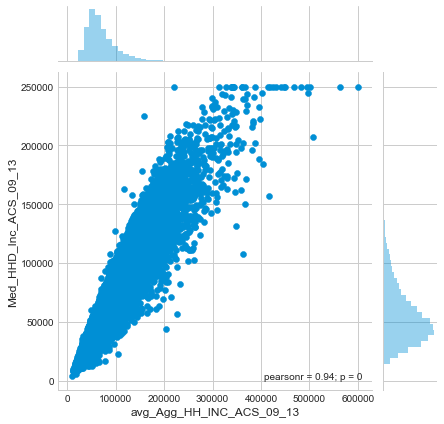

In [9]:
sns.jointplot(df.avg_Agg_HH_INC_ACS_09_13, df.Med_HHD_Inc_ACS_09_13)

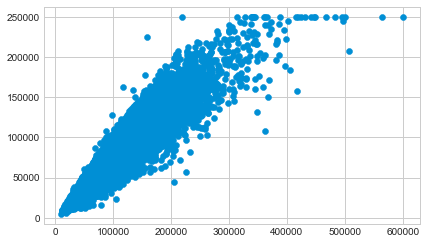

In [10]:
plt.scatter(df.avg_Agg_HH_INC_ACS_09_13, df.Med_HHD_Inc_ACS_09_13)

Let's keep the Median Income. It isn't too far wide of a range than the Average Aggregate Income is. Also they're too correlated with each other as well.

### Housing value exploration

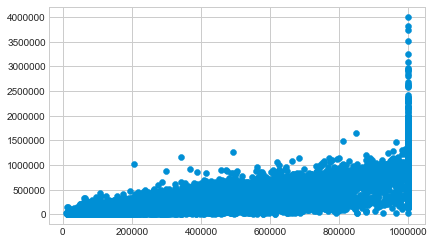

In [11]:
plt.scatter(df.Med_House_value_ACS_09_13,df.avg_Agg_House_Value_ACS_09_13)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


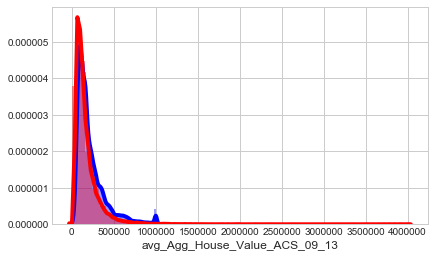

In [12]:
sns.distplot(df.Med_House_value_ACS_09_13, color='blue', label = 'Average Aggregate Income')
sns.distplot(df.avg_Agg_House_Value_ACS_09_13, color='red', label = 'Median Income')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


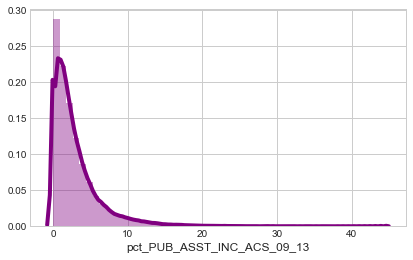

In [13]:
sns.distplot(df.pct_PUB_ASST_INC_ACS_09_13, color='purple')

### Poverty features exploration

In [14]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
   

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


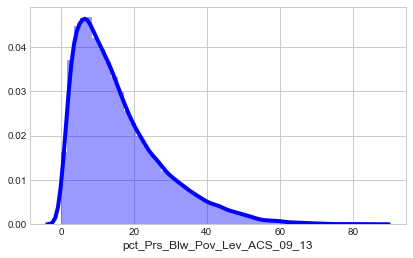

In [15]:
sns.distplot(df.pct_Prs_Blw_Pov_Lev_ACS_09_13, color='blue', label='% below Poverty')

### Population  exploration

In [16]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
   

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


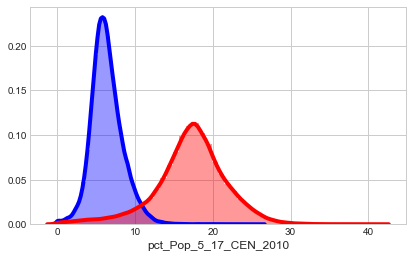

In [88]:
sns.distplot(df.pct_Pop_Under_5_CEN_2010, color='blue')
sns.distplot(df.pct_Pop_5_17_CEN_2010, color='red')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


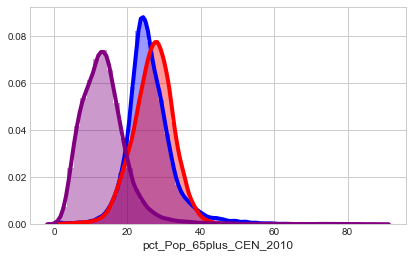

In [18]:
sns.distplot(df.pct_Pop_25_44_CEN_2010, color='blue', label='25 to 44')
sns.distplot(df.pct_Pop_45_64_CEN_2010, color='red', label='45 to 64')
sns.distplot(df.pct_Pop_65plus_CEN_2010, color='purple', label='65 plus')

### Citizenship Feature exploration

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


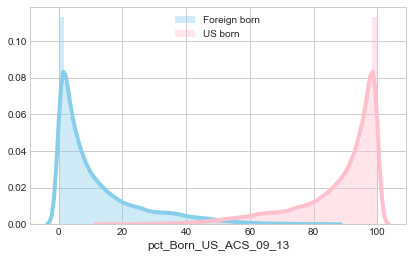

In [19]:
sns.distplot( df["pct_Born_foreign_ACS_09_13"] , color="skyblue", label="Foreign born")
sns.distplot( df["pct_Born_US_ACS_09_13"] , color="pink", label="US born")
plt.legend()

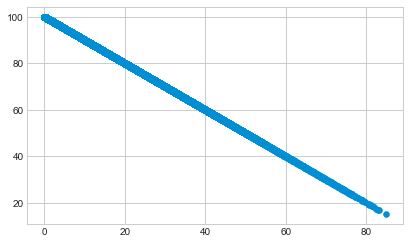

In [20]:
plt.scatter(df.pct_Born_foreign_ACS_09_13, df.pct_Born_US_ACS_09_13)

In [21]:
df.pct_Born_foreign_ACS_09_13.corr(df.pct_Born_US_ACS_09_13) 

-0.9999999999999994

In [84]:
df.pct_Born_US_ACS_09_13.value_counts(ascending=False).head(20)

100.000000    1522
96.296296       11
98.039216        9
97.916667        9
95.652174        8
92.307692        8
97.222222        8
93.750000        8
96.666667        7
98.571429        7
99.346405        7
95.238095        7
88.888889        7
97.142857        7
83.333333        7
93.333333        7
99.145299        6
98.750000        6
93.939394        6
98.717949        6
Name: pct_Born_US_ACS_09_13, dtype: int64

In [87]:
df.pct_Born_foreign_ACS_09_13.value_counts(ascending=False).head(20)

0.000000     1522
3.703704       11
2.083333        9
1.960784        9
6.250000        8
2.777778        8
4.347826        8
7.692308        8
16.666667       7
0.653595        7
1.428571        7
4.761905        7
2.857143        7
3.333333        7
6.666667        7
11.111111       7
0.787402        6
40.000000       6
1.250000        6
0.854701        6
Name: pct_Born_foreign_ACS_09_13, dtype: int64

This is a STRONG relationship. This shouldn't be a surprise. I should avoid putting them both together into a model.

### Ethnicity Features exploration

In [22]:
'pct_Hispanic_CEN_2010'
'pct_NH_White_alone_CEN_2010'
'pct_NH_Blk_alone_CEN_2010'
'pct_NH_Asian_alone_CEN_2010'
'pct_NH_AIAN_alone_CEN_2010' #american indian and native american
'pct_NH_NHOPI_alone_CEN_2010' #native Hawaiian, Guam, Samoan, other Pacific Islander
'pct_NH_SOR_alone_CEN_2010' #anyone other than the above

'pct_NH_SOR_alone_CEN_2010'

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


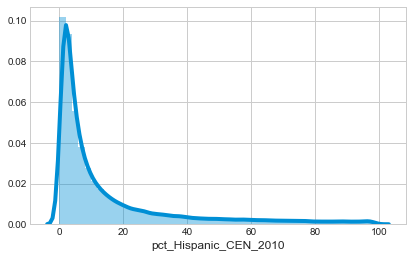

In [23]:
sns.distplot(df.pct_Hispanic_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


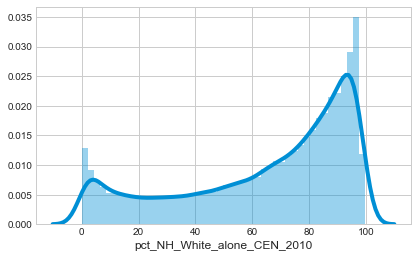

In [24]:
sns.distplot(df.pct_NH_White_alone_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


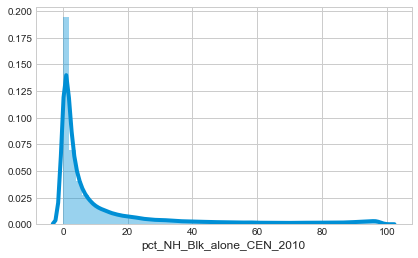

In [25]:
sns.distplot(df.pct_NH_Blk_alone_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


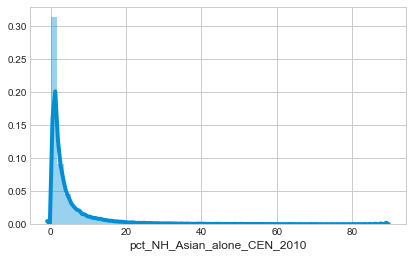

In [26]:
sns.distplot(df.pct_NH_Asian_alone_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


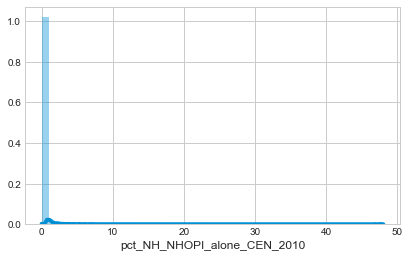

In [27]:
sns.distplot(df.pct_NH_NHOPI_alone_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


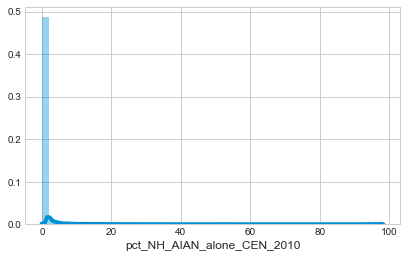

In [28]:
sns.distplot(df.pct_NH_AIAN_alone_CEN_2010)

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


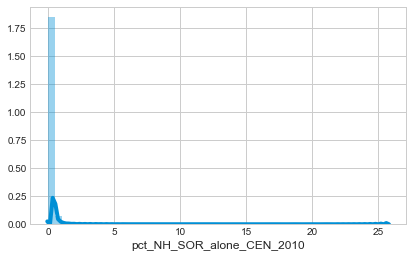

In [81]:
sns.distplot(df.pct_NH_SOR_alone_CEN_2010)

Might be good to avoid putting into the models: NHOPI, SOR, AIAN population features

### Other population demographics/socioeconomic features exploration

In [29]:
#Interesting they don't have HS graduate feature as they only have not a high school graduate.

##### Health insurance feature exploration

In [30]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
   

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


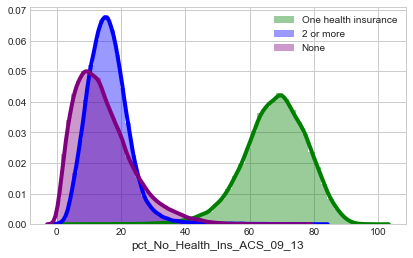

In [31]:
sns.distplot(df["pct_One_Health_Ins_ACS_09_13"] , color="green", label="One health insurance")
sns.distplot(df["pct_TwoPHealth_Ins_ACS_09_13"] , color="blue", label="2 or more")
sns.distplot(df['pct_No_Health_Ins_ACS_09_13'], color='purple', label='None')
plt.legend() 

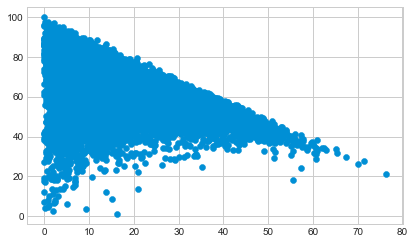

In [32]:
plt.scatter(df.pct_No_Health_Ins_ACS_09_13, df.pct_One_Health_Ins_ACS_09_13)

In [33]:
df.pct_No_Health_Ins_ACS_09_13.corr(df.pct_One_Health_Ins_ACS_09_13) #pretty correlated with one another, so
#let's just include just one of them

-0.6615243188768207

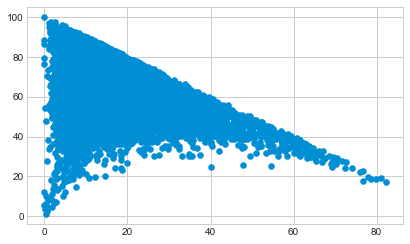

In [34]:
plt.scatter(df.pct_TwoPHealth_Ins_ACS_09_13, df.pct_One_Health_Ins_ACS_09_13)

In [35]:
df.pct_TwoPHealth_Ins_ACS_09_13.corr(df.pct_One_Health_Ins_ACS_09_13)

-0.3516175746746174

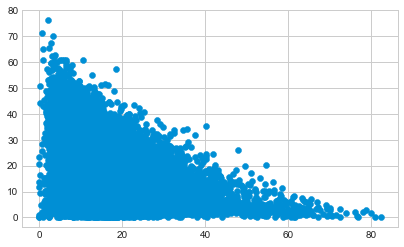

In [36]:
plt.scatter(df.pct_TwoPHealth_Ins_ACS_09_13, df.pct_No_Health_Ins_ACS_09_13)

In [37]:
df.pct_TwoPHealth_Ins_ACS_09_13.corr(df.pct_No_Health_Ins_ACS_09_13)

-0.3327933961736722

Might be good just to exclude the 2 or more health insurance feature. It's correlated with the one health insurance feature and there are lot more 0 values for it. Come to think of it, maybe it isn't good to consider health insurance. Let's see when we model..

#### College, Not HS Grad Feature exploration

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


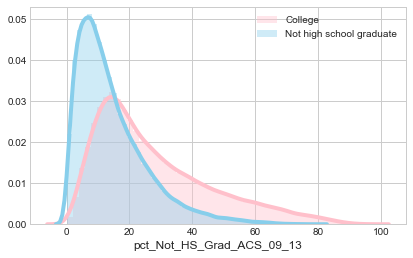

In [38]:
sns.distplot( df["pct_College_ACS_09_13"] , color="pink", label="College")
sns.distplot( df["pct_Not_HS_Grad_ACS_09_13"] , color="skyblue", label="Not high school graduate")
plt.legend()

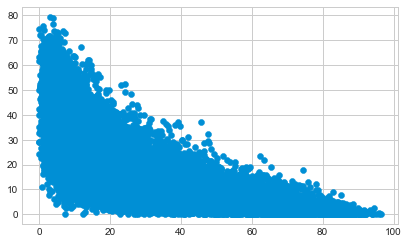

In [39]:
plt.scatter(df.pct_College_ACS_09_13, df.pct_Not_HS_Grad_ACS_09_13)

In [40]:
df.pct_College_ACS_09_13.corr(df.pct_Not_HS_Grad_ACS_09_13)

-0.6621759973422107

Let's still include these two as a feature

### Employment Features exploration

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


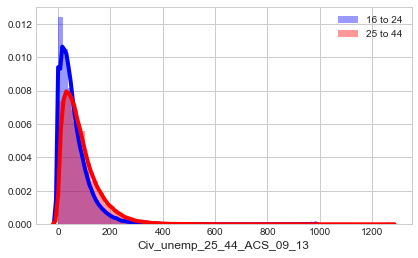

In [41]:
sns.distplot(df.Civ_unemp_16_24_ACS_09_13, color='blue', label='16 to 24')
sns.distplot(df.Civ_unemp_25_44_ACS_09_13, color='red', label = '25 to 44')
plt.legend()

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


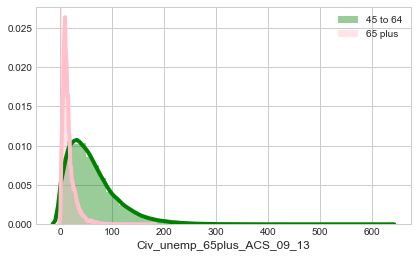

In [42]:
sns.distplot(df.Civ_unemp_45_64_ACS_09_13, color='green', label='45 to 64')
sns.distplot(df.Civ_unemp_65plus_ACS_09_13, color='pink', label='65 plus')
plt.legend()

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


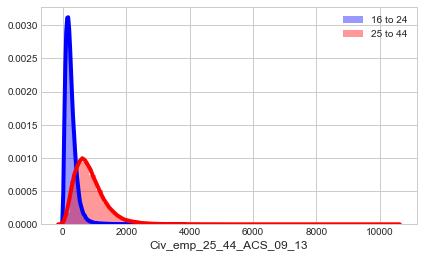

In [43]:
sns.distplot(df.Civ_emp_16_24_ACS_09_13, color='blue', label='16 to 24')
sns.distplot(df.Civ_emp_25_44_ACS_09_13, color='red', label = '25 to 44')
plt.legend()

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


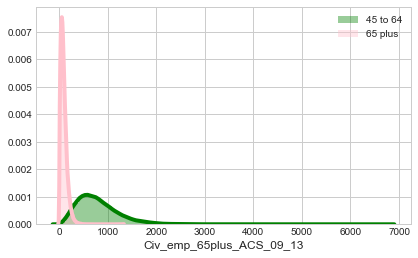

In [44]:
sns.distplot(df.Civ_emp_45_64_ACS_09_13, color='green', label='45 to 64')
sns.distplot(df.Civ_emp_65plus_ACS_09_13, color='pink', label='65 plus')
plt.legend()

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


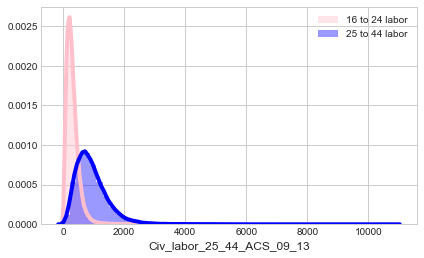

In [45]:
sns.distplot(df.Civ_labor_16_24_ACS_09_13, color='pink', label='16 to 24 labor')
sns.distplot(df.Civ_labor_25_44_ACS_09_13, color='blue', label='25 to 44 labor')
plt.legend()

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


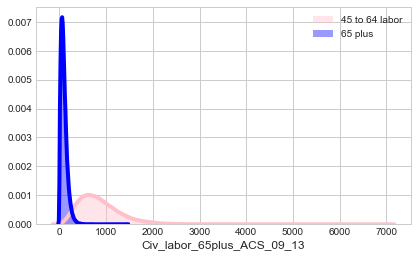

In [46]:
sns.distplot(df.Civ_labor_45_64_ACS_09_13, color='pink', label='45 to 64 labor')
sns.distplot(df.Civ_labor_65plus_ACS_09_13, color='blue', label='65 plus')
plt.legend()

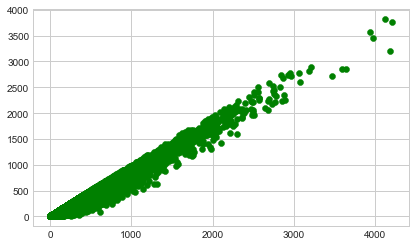

In [47]:
plt.scatter(df.Civ_labor_16_24_ACS_09_13, df.Civ_emp_16_24_ACS_09_13, color='green')

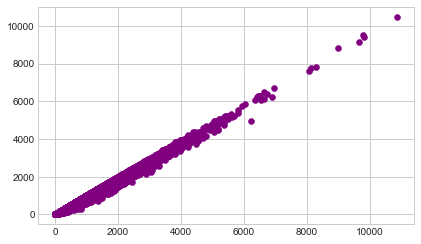

In [48]:
plt.scatter(df.Civ_labor_25_44_ACS_09_13, df.Civ_emp_25_44_ACS_09_13, color='purple')

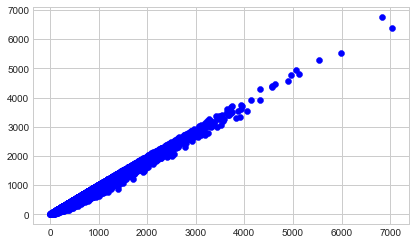

In [49]:
plt.scatter(df.Civ_labor_45_64_ACS_09_13, df.Civ_emp_45_64_ACS_09_13, color='blue')

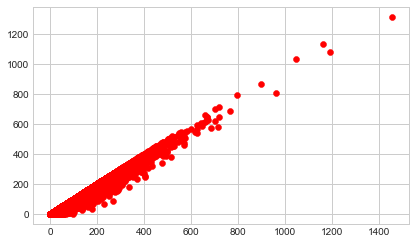

In [50]:
plt.scatter(df.Civ_labor_65plus_ACS_09_13, df.Civ_emp_65plus_ACS_09_13, color='red')

Might be good to exclude labor data as we want to compare employed vs. unemployed so including both the unemployment and employed features would be interesting to look at.

In [51]:
df.shape

(70219, 57)

In [52]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_emp_16_24_ACS_09_13', 'Civ_unemp_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_emp_45_64_ACS_09_13', 'Civ_unemp_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
   

## Let's feature engineer the data!

#### Let's create an employed and unemployed column

In [53]:
df['Employed'] = df.Civ_emp_16_24_ACS_09_13 + df.Civ_emp_25_44_ACS_09_13 + df.Civ_emp_45_64_ACS_09_13 + df.Civ_emp_65plus_ACS_09_13

In [54]:
df['Unemployed'] = df.Civ_unemp_16_24_ACS_09_13 + df.Civ_unemp_25_44_ACS_09_13 + df.Civ_unemp_45_64_ACS_09_13  + df.Civ_unemp_65plus_ACS_09_13

I want to create a new feature that looks at the employed to unemployed ratio. But, I'm going to have an issue when I'm dividing by zero as I have some unemployment values that equal 0.0, so let's construct a .apply lambda function to spit out the value as a really small number (i.e. 0.00001) if the unemployment value is 0.0. Everything else, I will calculate the feature engineering.

In [55]:
df['Unemployed'] = df['Unemployed'].apply(lambda x: 0.0001 if x == 0.0 else x)

In [56]:
#feature engineering the ratio
df['Emp_Unemp_Ratio'] = df.Employed/df.Unemployed

In [57]:
df = df.drop(['Civ_emp_16_24_ACS_09_13',
       'Civ_unemp_16_24_ACS_09_13', 'Civ_emp_25_44_ACS_09_13',
       'Civ_unemp_25_44_ACS_09_13', 'Civ_emp_45_64_ACS_09_13',
       'Civ_unemp_45_64_ACS_09_13', 'Civ_emp_65plus_ACS_09_13',
       'Civ_unemp_65plus_ACS_09_13'],axis=1)

In [58]:
df.shape

(70219, 52)

#### Might be good to look at the interaction between ethnicity and median income, so let's create interaction terms!

In [59]:
df['Hispanic_Income'] = df.Hispanic_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

In [60]:
df['White_Income'] = df.NH_White_alone_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

In [61]:
df['Black_Income'] = df.NH_Blk_alone_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

In [62]:
df['Asian_Income'] = df.NH_Asian_alone_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

In [63]:
df['AIAN_Income'] = df.NH_AIAN_alone_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

In [64]:
df['SOR_Income'] = df.NH_SOR_alone_ACS_09_13 * df.Med_HHD_Inc_ACS_09_13

In [65]:
df['NHOPI_Income'] = df.NH_NHOPI_alone_CEN_2010 * df.Med_HHD_Inc_ACS_09_13

### EDA on my featured engineered features

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


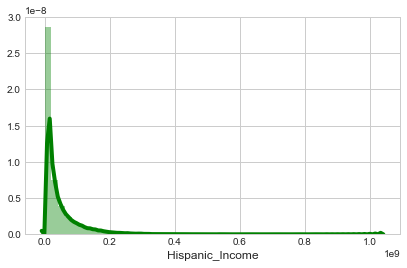

In [66]:
sns.distplot(df["Hispanic_Income"] , color="green", label="Hispanic Income")

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


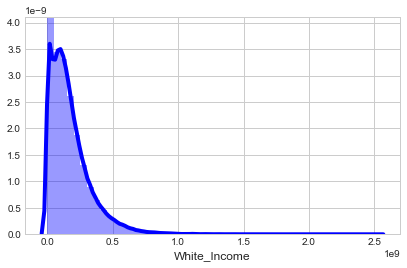

In [67]:
sns.distplot(df["White_Income"] , color="blue", label="White Income")

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


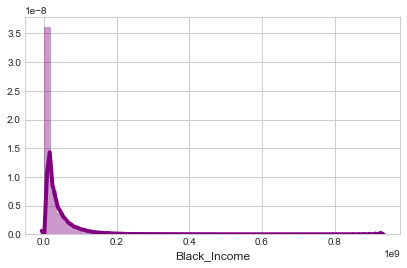

In [68]:
sns.distplot(df['Black_Income'], color='purple', label='Black Income')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


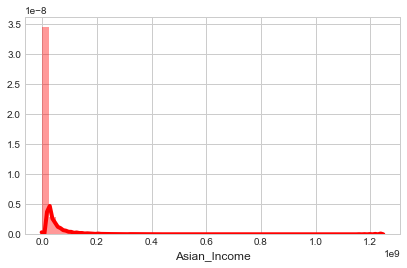

In [69]:
sns.distplot(df['Asian_Income'], color='red', label='Asian Income')


/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


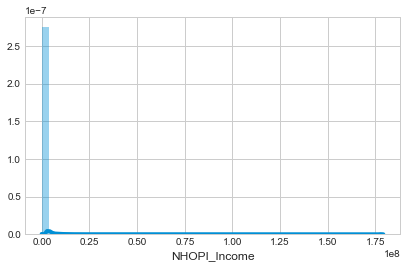

In [70]:
sns.distplot(df['NHOPI_Income']) 

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


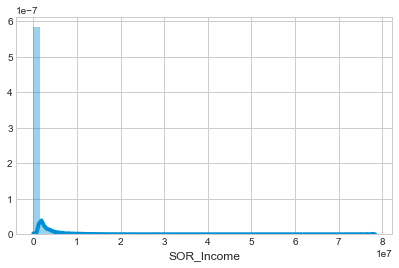

In [71]:
sns.distplot(df['SOR_Income'])

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


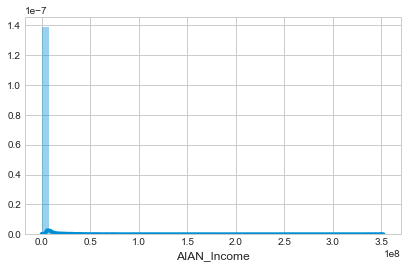

In [72]:
sns.distplot(df['AIAN_Income'])

Maybe not worth it to put in the NHOPI, SOR, and AIAN income

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


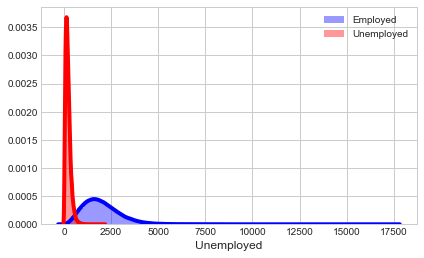

In [73]:
sns.distplot(df['Employed'], color='blue', label='Employed')
sns.distplot(df['Unemployed'], color='red', label='Unemployed')
plt.legend()

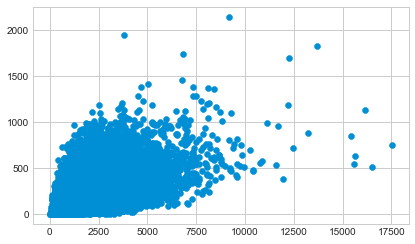

In [74]:
plt.scatter(df.Employed, df.Unemployed)

### Final check on the shape and the columns we have in our model data

In [75]:
df.shape

(70219, 59)

In [76]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',

In [77]:
df = df.drop(['Hispanic_CEN_2010',
       'NH_White_alone_CEN_2010', 'NH_Blk_alone_CEN_2010',
       'NH_Blk_alone_ACS_09_13', 'NH_AIAN_alone_CEN_2010',
       'NH_AIAN_alone_ACS_09_13', 'NH_Asian_alone_CEN_2010',
       'NH_Asian_alone_ACS_09_13', 'NH_NHOPI_alone_CEN_2010',
       'NH_NHOPI_alone_ACS_09_13', 'NH_SOR_alone_CEN_2010',
       'NH_SOR_alone_ACS_09_13', 'Civ_labor_16_24_ACS_09_13',
       'Civ_labor_25_44_ACS_09_13', 'Civ_labor_45_64_ACS_09_13',
       'Civ_labor_65plus_ACS_09_13', 'avg_Agg_HH_INC_ACS_09_13',
       'avg_Agg_House_Value_ACS_09_13'],axis=1)

In [90]:
df.shape

(70219, 41)

In [79]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

In [80]:
df.head()

,State_name,County_name,Tract,Med_HHD_Inc_ACS_09_13,Med_House_value_ACS_09_13,has_superfund,pct_Not_HS_Grad_ACS_09_13,pct_Born_foreign_ACS_09_13,pct_Born_US_ACS_09_13,pct_PUB_ASST_INC_ACS_09_13,...,Employed,Unemployed,Emp_Unemp_Ratio,Hispanic_Income,White_Income,Black_Income,Asian_Income,AIAN_Income,SOR_Income,NHOPI_Income
0,Alabama,Autauga County,20100,63030.0,124800.0,0,19.277108,0.276549,99.723451,0.000000,...,870.0,25.0,34.800000,2773320.0,100911030.0,13677510.0,882420.0,819390.0,0.0,0.0
1,Alabama,Autauga County,20200,44019.0,129200.0,0,23.149394,3.057325,96.942675,0.720288,...,880.0,159.0,5.534591,3301425.0,37152036.0,53439066.0,220095.0,220095.0,0.0,0.0
2,Alabama,Autauga County,20300,43201.0,113800.0,0,11.432571,3.990841,96.009159,3.469211,...,1455.0,54.0,26.944444,3758487.0,109644138.0,27951047.0,734417.0,388809.0,0.0,216005.0
3,Alabama,Autauga County,20400,54730.0,130500.0,0,10.255570,2.566432,97.433568,0.971429,...,1929.0,251.0,7.685259,4652050.0,220561900.0,10453430.0,985140.0,602030.0,3283800.0,164190.0
4,Alabama,Autauga County,20500,65132.0,177000.0,0,4.369356,2.792369,97.207631,4.737733,...,5059.0,282.0,17.939716,23121860.0,549583816.0,92357176.0,19213940.0,2865808.0,0.0,390792.0


In [136]:
df.shape

(70219, 41)

In [111]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

In [396]:
df.to_csv('model_data.csv')